# Plotting datetime in matplotlib

In [1]:
# initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Figure with datetime axis

Very often we'll want to plot data for which the horizontal axis corresponds to datetime. Luckily, matplotlib recognizes pandas datetime format and can plot the datetime axis correctly. Let's again take the CalCOFI data as an example:

In [2]:
# loading the CalCOFI data
CalCOFI = pd.read_csv("data/CalCOFI_subset.csv", parse_dates = ["Datetime"])
display(CalCOFI)

,Cast_Count,Station_ID,Datetime,Depth_m,T_degC,Salinity,SigmaTheta
0,992,090.0 070.0,1950-02-06 19:54:00,0,14.040,33.1700,24.76600
1,992,090.0 070.0,1950-02-06 19:54:00,10,13.950,33.2100,24.81500
2,992,090.0 070.0,1950-02-06 19:54:00,20,13.900,33.2100,24.82600
3,992,090.0 070.0,1950-02-06 19:54:00,23,13.880,33.2100,24.83000
4,992,090.0 070.0,1950-02-06 19:54:00,30,13.810,33.2180,24.85100
...,...,...,...,...,...,...,...
10052,35578,090.0 070.0,2021-01-21 13:36:00,300,7.692,34.1712,26.67697
10053,35578,090.0 070.0,2021-01-21 13:36:00,381,7.144,34.2443,26.81386
10054,35578,090.0 070.0,2021-01-21 13:36:00,400,7.031,34.2746,26.85372
10055,35578,090.0 070.0,2021-01-21 13:36:00,500,6.293,34.3126,26.98372


Let's say we're interested in data at 10 m deep:

In [3]:
CalCOFI_10 = CalCOFI.loc[CalCOFI["Depth_m"] == 10]

We can plot how water temperature varies with time as follows:

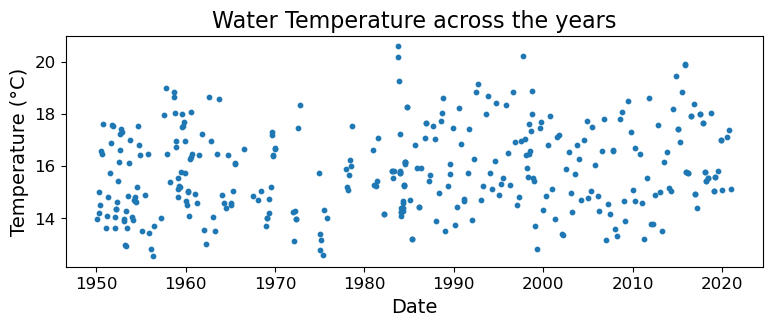

In [14]:
# date spans decades, so pick a "long" x-axis
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot()

# Note the use of .value to extract the underlying data when plotting
ax.scatter(CalCOFI_10["Datetime"].values, CalCOFI_10["T_degC"].values, s=10)

ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Temperature (°C)", fontsize=14)
ax.set_title("Water Temperature across the years", fontsize=16)
ax.tick_params(labelsize=12)

plt.show(fig)

Now let's suppose we want to focus on the year 1959. First we subset the data:

In [5]:
CalCOFI_10_1959 = CalCOFI_10.loc[
    (CalCOFI_10["Datetime"] >= pd.to_datetime("1959-01-01")) &
    (CalCOFI_10["Datetime"] < pd.to_datetime("1960-01-01"))
]

Now we plot the subsetted data. Notice where and how matplotlib places the ticks on the x- (temporal) axis:

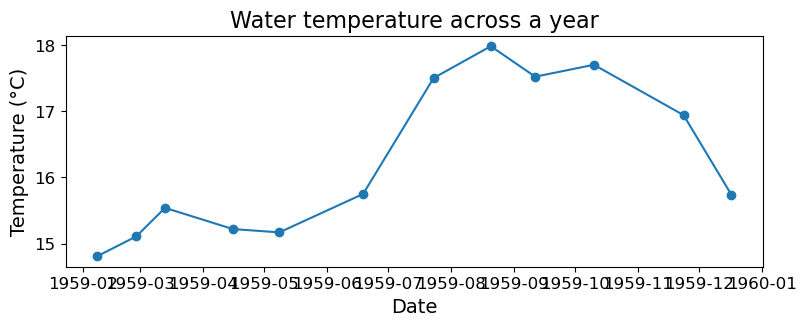

In [15]:
# date spans decades, so pick a "long" x-axis
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot()

# Note the use of .value to extract the underlying data when plotting
ax.plot(
    CalCOFI_10_1959["Datetime"].values, 
    CalCOFI_10_1959["T_degC"].values, 
    marker="o"
)

ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Temperature (°C)", fontsize=14)
ax.set_title("Water temperature across a year", fontsize=16)
ax.tick_params(labelsize=12)

plt.show(fig)

## Setting ticks and tick labels on datetime axis

While we can just plot the datetime as-is, sometimes we want better control of where the ticks are placed and how they are formatted. Such functionalities are provided by the `matplotlib.dates` submodule, which we import below:

In [9]:
import matplotlib.dates as mdates

The documentations of the submodule can be found here: [https://matplotlib.org/stable/api/dates_api.html](https://matplotlib.org/stable/api/dates_api.html)

Instead of using `ax.set_xticks()` and `ax.set_yticks()` to set the ticks and labels, we use `ax.xaxis.set_major_locator()` to specify the location of the ticks and `ax.xasis.set_major_formatter()` to specify the formatting of the ticks. It is easier to see how these work through an example, so here it is:

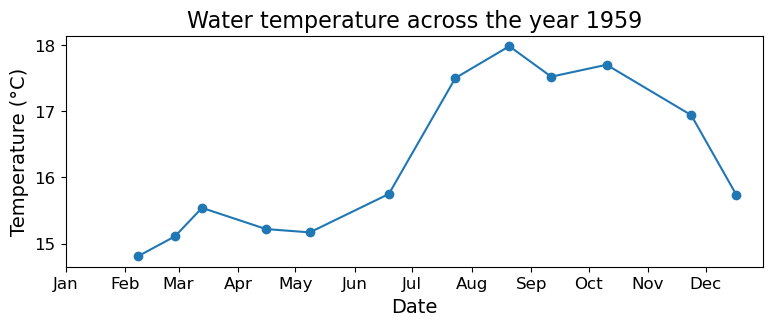

In [16]:
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot()

ax.plot(
    CalCOFI_10_1959["Datetime"].values, 
    CalCOFI_10_1959["T_degC"].values, 
    marker="o"
)

ax.set_xlim(pd.to_datetime("1959-01-01"), pd.to_datetime("1959-12-31"))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Temperature (°C)", fontsize=14)
ax.set_title("Water temperature across the year 1959", fontsize=16)
ax.tick_params(labelsize=12)

plt.show(fig)

We use `mdates.MonthLocator()` to tell matplotlib that we want one tick every month. And we use `mdates.DateFormatter("%b")` to tell matplotlib that each tick label should display the short name of the month, and nothing else. Note that `mdates.DateFormatter()` again uses the **datetime format code** [https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) to specify the formatting of tick labels.

`matplotlib.mdates` has a few more locators available in addition to `MonthLocator()`. For example:

+ `DayLocator()`: ticks placed on day-level intervals
+ `MonthLocator()`: ticks placed on month-level intervals
+ `YearLocator()`: ticks placed on year-level intervals
+ `HourLocator()`: ticks placed on hour-level intervals
+ `MinuteLocator()`: ticks placed on minute-level intervals

Note that these locators have optional arguments. For example, to display a tick every 15th of the month, we can do:

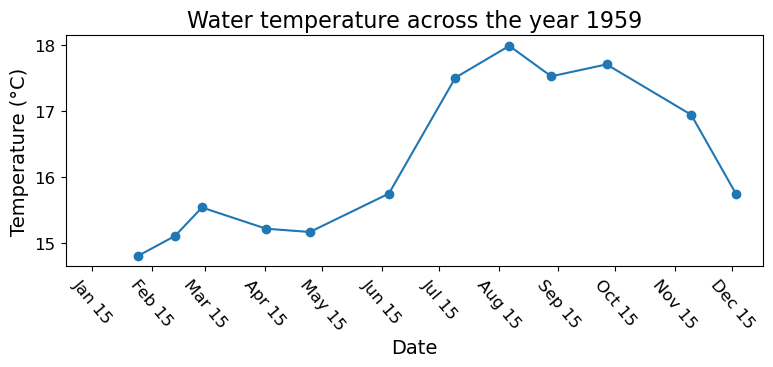

In [20]:
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot()

ax.plot(
    CalCOFI_10_1959["Datetime"].values, 
    CalCOFI_10_1959["T_degC"].values, 
    marker="o"
)

ax.set_xlim(pd.to_datetime("1959-01-01"), pd.to_datetime("1959-12-31"))
ax.xaxis.set_major_locator(mdates.DayLocator([15]))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
ax.tick_params("x", labelrotation=-50)

ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Temperature (°C)", fontsize=14)
ax.set_title("Water temperature across the year 1959", fontsize=16)
ax.tick_params(labelsize=12)

plt.show(fig)

Note also that we handled long tick labels by rotating them, which is achieved using the `ax.tick_params("x", labelrotation=-50)` line.